# INDIAN SIGNBOARD TRANSLATION

In [1]:
cd D:\Signboard project\DATA

D:\Signboard project\DATA


# Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
import random

In [3]:
cwd=os.getcwd()

# Load data

In [4]:
def load_images_from_folder(folder):
    images = []
    names  = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            names.append(filename)
    return images,names

In [5]:
images,names=load_images_from_folder(cwd)

In [6]:
len(images)

25

# SOME IMAGES FROM OUR DATASET :

(497, 740, 3)


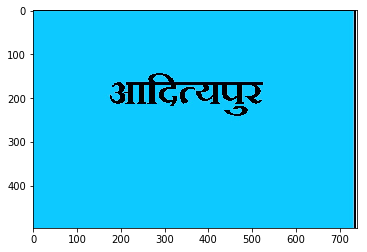

(497, 740, 3)


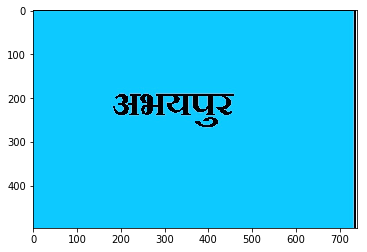

(871, 1297, 3)


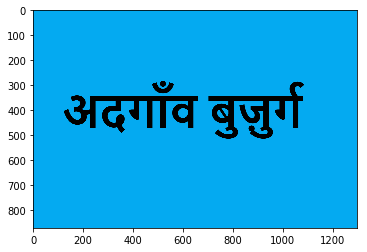

(871, 1297, 3)


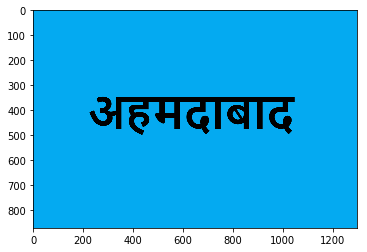

(871, 1297, 3)


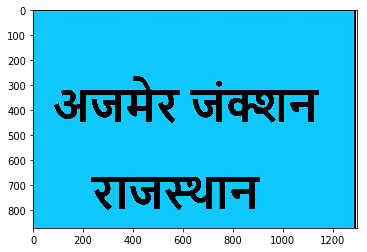

In [7]:
for i in range(5):
    print(images[i].shape)
    plt.imshow(images[i])
    plt.show()

In [8]:
# Data Augmentation can be done

# Finding area containing text :

In [9]:
import os
import shutil

In [10]:
# Utility functions

def crop(img):
    '''img is image read with imread'''
    
    if img.shape[0]>500:
        img=img[150:-30,:-50,:]
    return img    

def show(image):
    cv2.namedWindow('win',cv2.WINDOW_NORMAL)
    cv2.imshow('win',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def erosion(image_binary):
    kernel = np.ones((3,3), np.uint8)
    erode=cv2.erode(image_binary,kernel)
    return erode

In [11]:
# delete crops folder
shutil.rmtree('./crops/')

In [12]:
#create empty crops folder
os.makedirs('./crops', exist_ok=True)

In [13]:
#counter=0
for im,file in zip(images,names):
    #counter+=1
    image=crop(im)    

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, image_binary) = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
    #show(image_binary)
    
    # eroded image
    erode=erosion(image_binary)
    #show(erode)
    
    # making contours
    im2, contours, hierarchy = cv2.findContours(erode,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    mask=list(hierarchy[0][:,-1]<=-1)   #0,-1
    ids=np.arange(len(hierarchy[0]))
    mid=ids[mask]
    new_cnts=[contours[i] for i in mid]
    cnts_temp=[i for i in new_cnts if cv2.contourArea(i)>1000.0]  
    #len(contours),len(new_cnts),len(cnts_temp)
    
    samp=image.copy()
    
    # Saving images (cropped)
    for sr,i in enumerate(cnts_temp):
        x,y,w,h=cv2.boundingRect(i)
        cv2.imwrite('crops/'+file+str(sr)+'.png',image[y:y+h,x:x+w])
        #cv2.rectangle(samp,(x,y),(x+w,y+h),(0,0,255),2)
        #cv2.imwrite('samp.png',samp)

# Optical Character Recognition(OCR) for Hindi Words:

In [14]:
import pytesseract

In [15]:
images,names=load_images_from_folder('./crops')

In [16]:
len(images)

26

In [17]:
data=[]
for i in images:
    #plt.imshow(i)
    text = pytesseract.image_to_string(i, lang = 'hin')
    #print(text)
    data.append(text)

# Storing it in a csv for further use

In [23]:
df=pd.DataFrame(columns=['Text_Extracted'],data=data)
df.replace('\n',' ',inplace=True,regex=True)

In [24]:
df.head()

,Text_Extracted
0,आदित्यपुर
1,अभयपर च्य्फ
2,अदगाव बुजुर्ग
3,अहमदाबाद
4,अजमेर जंक्शन राजस्थान


In [25]:
df.to_csv('hindi_output.csv', sep=',', encoding='utf-8')